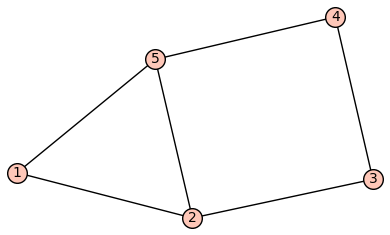

In [ ]:
### Koda v Sage-u, ki izriše graf s 5 vozlišči in 6 povezavami

# Uvozim razred Graph iz SageMath-a
G = Graph()

# Dodam 5 vozlišč
G.add_vertices([1, 2, 3, 4, 5])

# Vozliščem dodam povezave
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (2, 5)]
G.add_edges(edges)
# nov komentar 
# Izrišem graf
G.show()
